In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
url = 'https://raw.githubusercontent.com/BrianBehnke/Week5-NFL-Salary-Project/master/NFLdataExtract.csv'
nfl_data=pd.read_csv(url)
nfl_data.head()

,Number of Records,Passing TD weighted,Passing TDs,Player,Position-1,Position,Pts,Salary,Team-1,Team
0,1,0.0,0,A.J. Derby,TE,NaN,12,705000,MIA,2TM
1,1,0.0,0,A.J. Green,WR,WR,48,10550000,CIN,CIN
2,1,0.0,0,Aaron Jones,RB,rb,24,489706,GNB,GNB
3,1,0.0,0,Adam Humphries,WR,wr,6,2914000,TAM,TAM
4,1,0.0,0,Adam Shaheen,TE,te,18,733661,CHI,CHI


In [4]:
nfl_data.shape

(408, 10)

In [6]:
nfl_data.describe()

,Number of Records,Passing TD weighted,Passing TDs,Pts,Salary
count,408.0,408.000000,408.000000,408.000000,4.080000e+02
mean,1.0,0.520833,1.041667,24.254902,2.411662e+06
std,0.0,2.312541,4.625082,29.065016,3.137377e+06
min,1.0,0.000000,0.000000,1.000000,1.216000e+05
25%,1.0,0.000000,0.000000,6.000000,6.375000e+05
50%,1.0,0.000000,0.000000,12.000000,1.000000e+06
75%,1.0,0.000000,0.000000,30.000000,2.517500e+06
max,1.0,17.000000,34.000000,158.000000,2.250000e+07


In [7]:
nfl_data.sample(10)

,Number of Records,Passing TD weighted,Passing TDs,Player,Position-1,Position,Pts,Salary,Team-1,Team
372,1,0.0,0,Theo Riddick,RB,rb,30,2700000,DET,DET
157,1,0.0,0,Fletcher Cox,DT,DT,6,11500000,PHI,PHI
130,1,0.0,0,Dion Lewis,RB,RB,60,2000000,TEN,NWE
261,1,0.0,0,Lamarcus Joyner,CB,FS,6,11287000,LAR,LAR
140,1,0.0,0,Dustin Hopkins,K,K,60,798928,WAS,WAS
238,1,0.0,0,Justin Hardy,WR,wr,18,705000,ATL,ATL
22,1,0.0,0,Amari Cooper,WR,WR,42,700000,2TM,OAK
255,1,13.5,27,Kirk Cousins,QB,QB,24,22500000,MIN,WAS
352,1,0.0,0,Sammy Watkins,WR,WR,48,790000,KAN,LAR
165,1,0.0,0,Golden Tate,WR,WR,30,7000000,2TM,DET


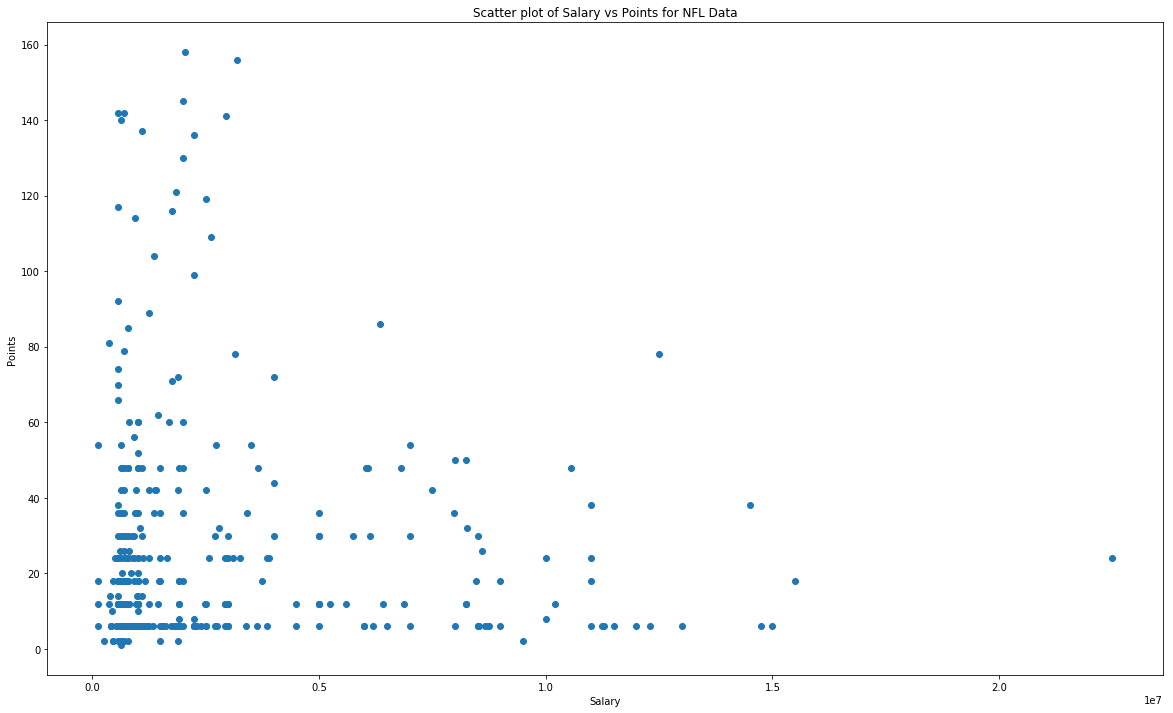

In [12]:
fig, ax1 = plt.subplots(figsize=(20, 12))
plt.title('Scatter plot of Salary vs Points for NFL Data')
plt.xlabel('Salary')
plt.ylabel('Points')
plt.scatter(nfl_data['Salary'], nfl_data['Pts'])
#plt.yscale('log')
plt.show()

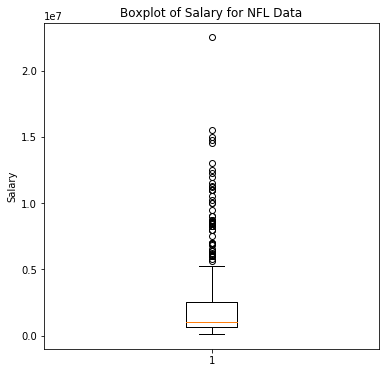

In [13]:
# That looks much nicer than the pie chart
# Lets try a box plot
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Boxplot of Salary for NFL Data')
plt.ylabel('Salary')

plt.boxplot(nfl_data['Salary'])
plt.show()

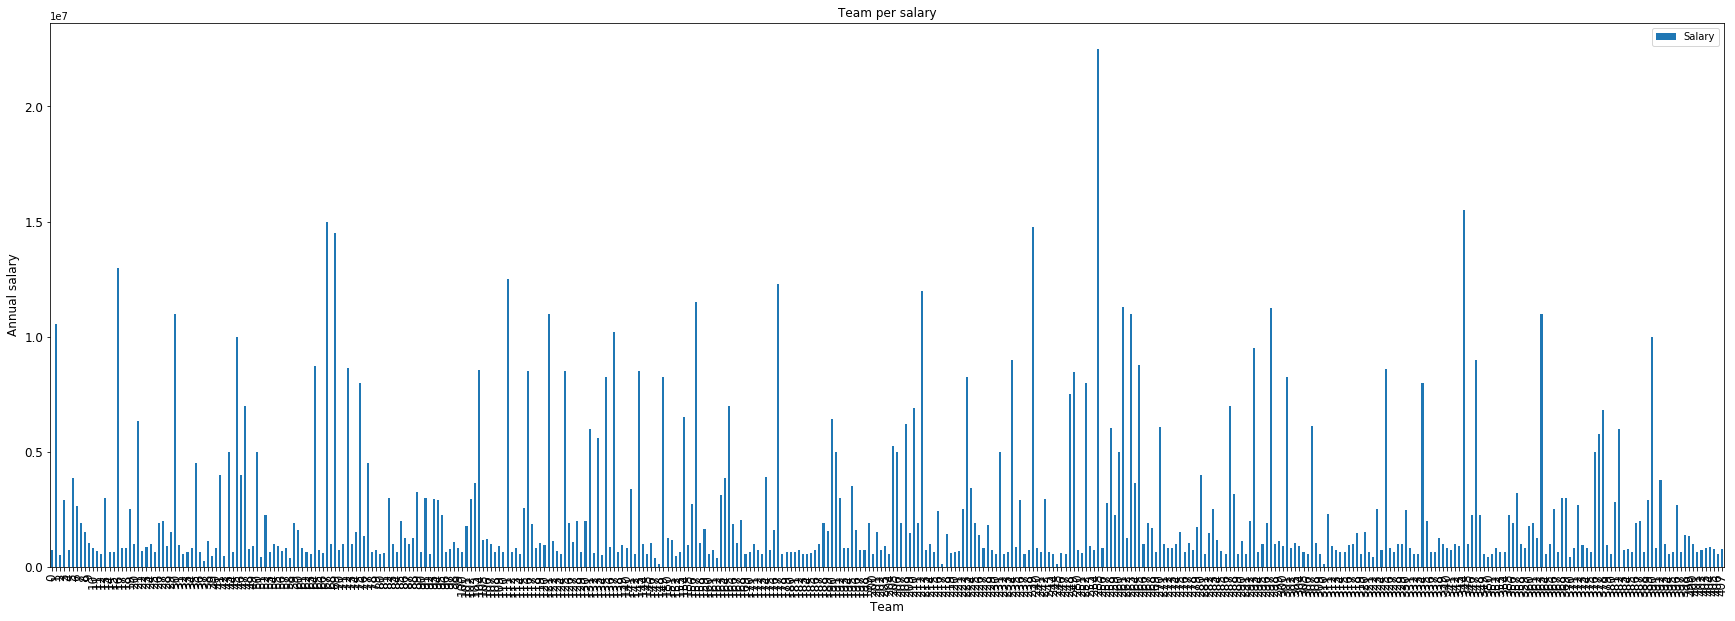

In [14]:
ax = nfl_data[['Team','Salary']].plot(kind='bar', title ="Team per salary", figsize=(30, 10), legend=True, fontsize=12)
ax.set_xlabel("Team", fontsize=12)
ax.set_ylabel("Annual salary", fontsize=12)
#plt.yscale('log')
plt.show()

In [15]:
nfl_scorers = nfl_data.loc[nfl_data['Pts'] >= 10]
nfl_scorers.head().T

,0,1,2,4,5
Number of Records,1,1,1,1,1
Passing TD weighted,0,0,0,0,0
Passing TDs,0,0,0,0,0
Player,A.J. Derby,A.J. Green,Aaron Jones,Adam Shaheen,Adam Thielen
Position-1,TE,WR,RB,TE,WR
Position,NaN,WR,rb,te,WR
Pts,12,48,24,18,24
Salary,705000,10550000,489706,733661,3850000
Team-1,MIA,CIN,GNB,CHI,MIN
Team,2TM,CIN,GNB,CHI,MIN


In [16]:
nfl_scorers.describe()

,Number of Records,Passing TD weighted,Passing TDs,Pts,Salary
count,242.0,242.000000,242.000000,242.000000,2.420000e+02
mean,1.0,0.512397,1.024793,36.954545,2.436245e+06
std,0.0,2.271475,4.542949,32.058848,3.062609e+06
min,1.0,0.000000,0.000000,10.000000,1.216000e+05
25%,1.0,0.000000,0.000000,15.000000,7.050000e+05
50%,1.0,0.000000,0.000000,24.000000,1.000000e+06
75%,1.0,0.000000,0.000000,48.000000,2.914000e+06
max,1.0,17.000000,34.000000,158.000000,2.250000e+07


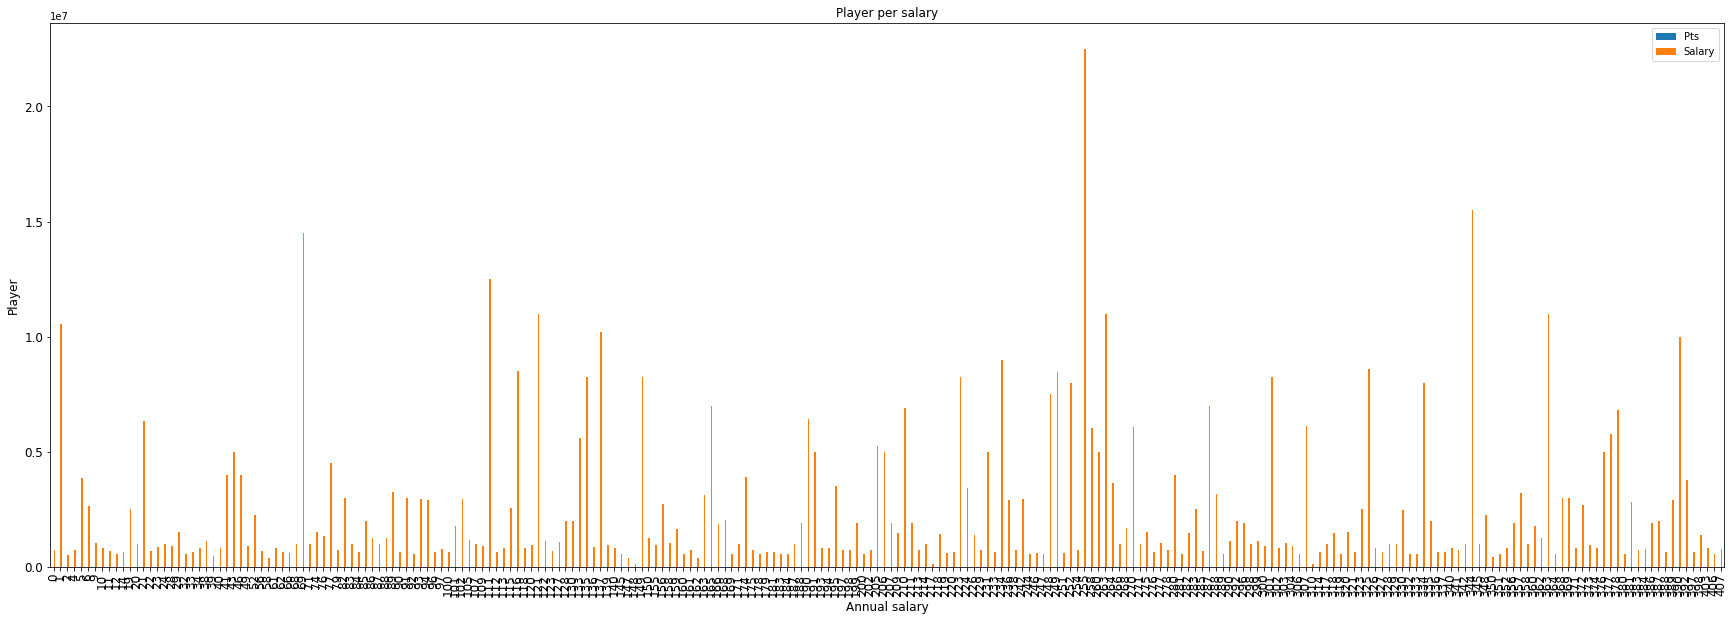

In [17]:
ax = nfl_scorers[['Pts','Salary']].plot(kind='bar', title ="Player per salary", figsize=(30, 10), legend=True, fontsize=12)
ax.set_ylabel("Player", fontsize=12)
ax.set_xlabel("Annual salary", fontsize=12)
#plt.yscale('log')
plt.show()

In [18]:
nfl_scorers.head()

,Number of Records,Passing TD weighted,Passing TDs,Player,Position-1,Position,Pts,Salary,Team-1,Team
0,1,0.0,0,A.J. Derby,TE,NaN,12,705000,MIA,2TM
1,1,0.0,0,A.J. Green,WR,WR,48,10550000,CIN,CIN
2,1,0.0,0,Aaron Jones,RB,rb,24,489706,GNB,GNB
4,1,0.0,0,Adam Shaheen,TE,te,18,733661,CHI,CHI
5,1,0.0,0,Adam Thielen,WR,WR,24,3850000,MIN,MIN


In [20]:
nfl_scorers = nfl_scorers.drop('Number of Records', axis=1)
nfl_scorers = nfl_scorers.drop('Position', axis=1)
nfl_scorers = nfl_scorers.drop('Team-1', axis=1)


KeyError: "['Number of Records'] not found in axis"

In [21]:
nfl_scorers.head()

,Passing TD weighted,Passing TDs,Player,Position-1,Pts,Salary,Team-1,Team
0,0.0,0,A.J. Derby,TE,12,705000,MIA,2TM
1,0.0,0,A.J. Green,WR,48,10550000,CIN,CIN
2,0.0,0,Aaron Jones,RB,24,489706,GNB,GNB
4,0.0,0,Adam Shaheen,TE,18,733661,CHI,CHI
5,0.0,0,Adam Thielen,WR,24,3850000,MIN,MIN


In [22]:
nfl_scorers.describe()

,Passing TD weighted,Passing TDs,Pts,Salary
count,242.000000,242.000000,242.000000,2.420000e+02
mean,0.512397,1.024793,36.954545,2.436245e+06
std,2.271475,4.542949,32.058848,3.062609e+06
min,0.000000,0.000000,10.000000,1.216000e+05
25%,0.000000,0.000000,15.000000,7.050000e+05
50%,0.000000,0.000000,24.000000,1.000000e+06
75%,0.000000,0.000000,48.000000,2.914000e+06
max,17.000000,34.000000,158.000000,2.250000e+07


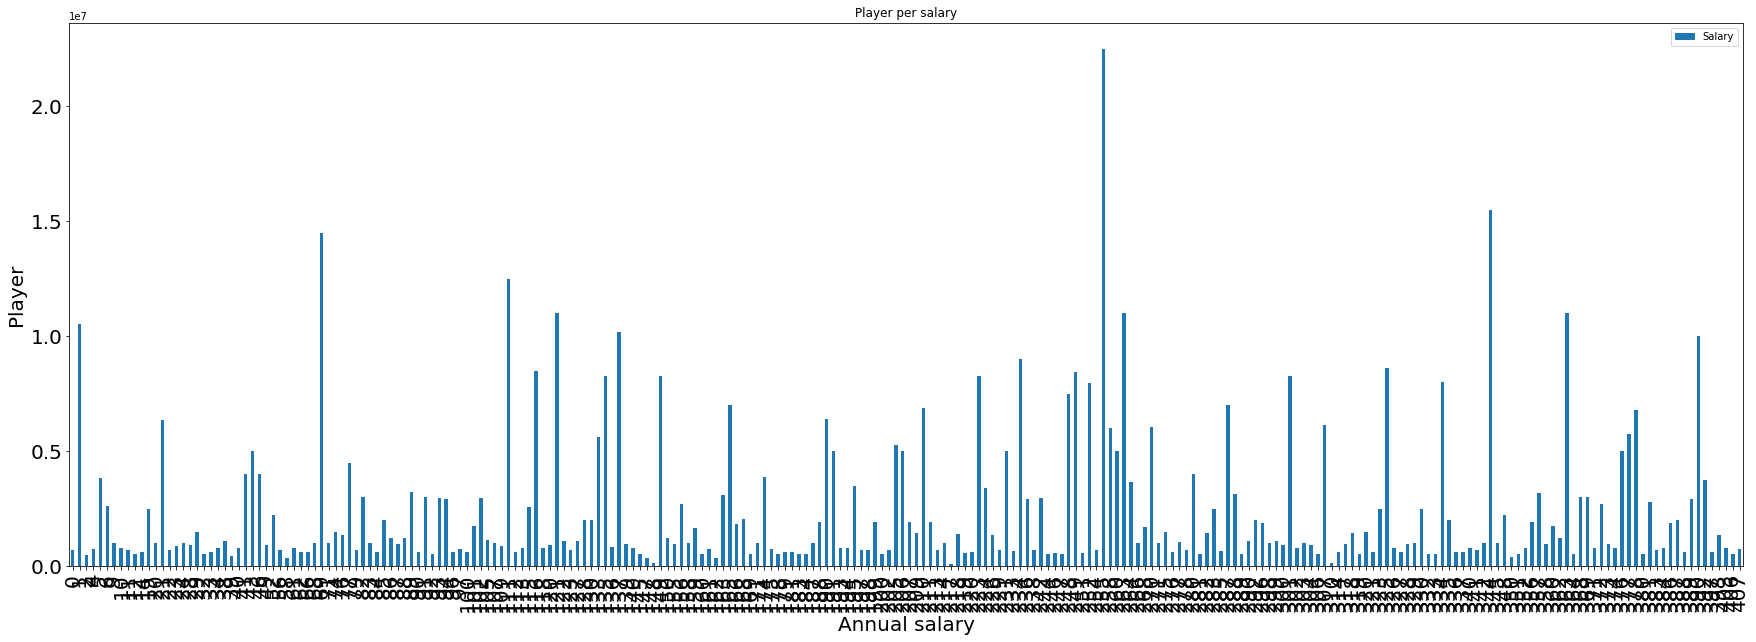

In [23]:
ax = nfl_scorers[['Player','Salary']].plot(kind='bar', title ="Player per salary", figsize=(30, 10), fontsize=20)
ax.set_ylabel("Player", fontsize=20)
ax.set_xlabel("Annual salary", fontsize=20)
plt.show()

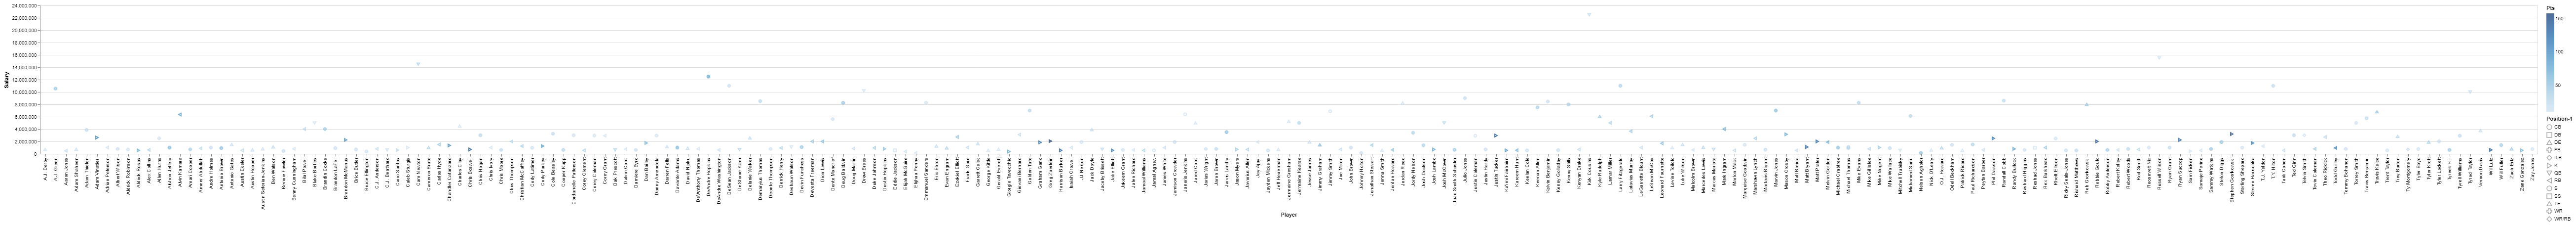

In [25]:
alt.Chart(nfl_scorers).mark_point().encode(
    x='Player',
    y='Salary',
    color='Pts',
    shape='Position-1'
)

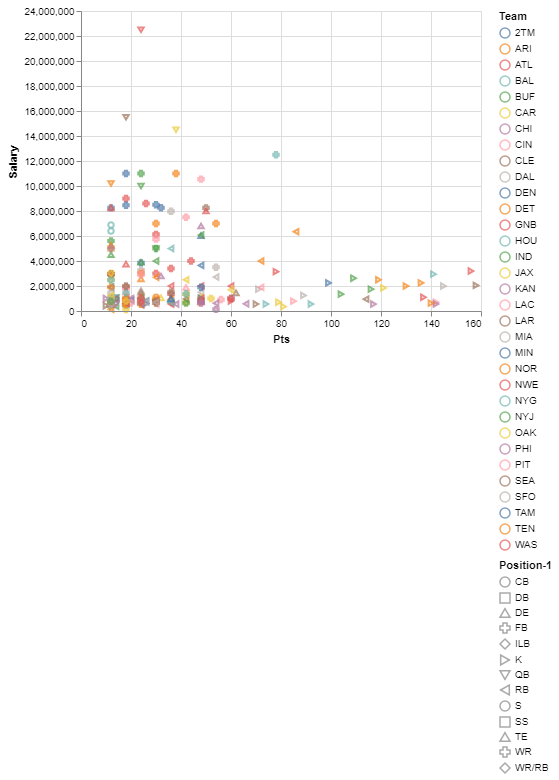

In [27]:
alt.Chart(nfl_scorers).mark_point().encode(
    x='Pts',
    y='Salary',
    color='Team',
    shape='Position-1'
)

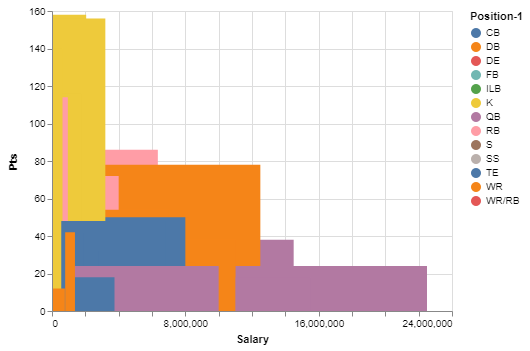

In [28]:
alt.Chart(nfl_scorers).mark_rect().encode(
    x='Salary',
    y='Pts',
    color='Position-1'
)

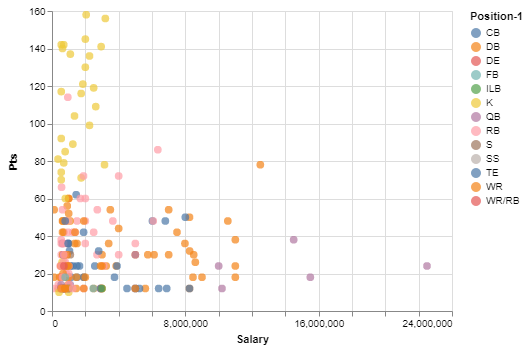

In [29]:
alt.Chart(nfl_scorers).mark_circle(size=60).encode(
    x='Salary',
    y='Pts',
    color='Position-1',
    tooltip=['Player', 'Salary', 'Pts', 'Position-1']
).interactive()

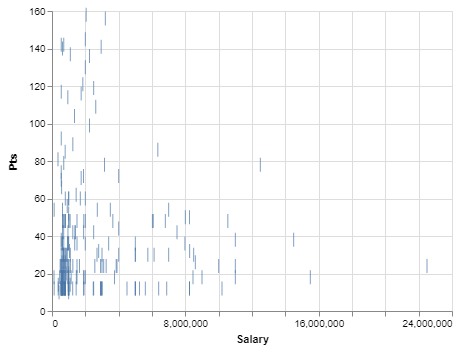

In [30]:
alt.Chart(nfl_scorers).mark_tick().encode(
    x='Salary',
    y='Pts'
)

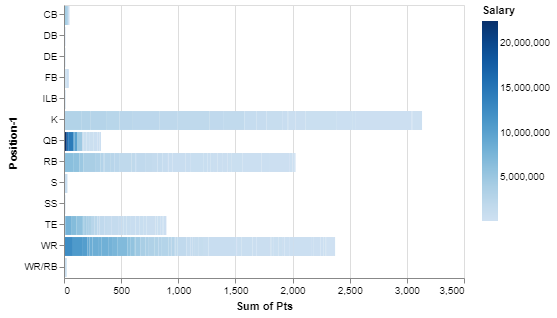

In [31]:
alt.Chart(nfl_scorers).mark_bar().encode(
    x='sum(Pts)',
    y='Position-1',
    color='Salary'
)

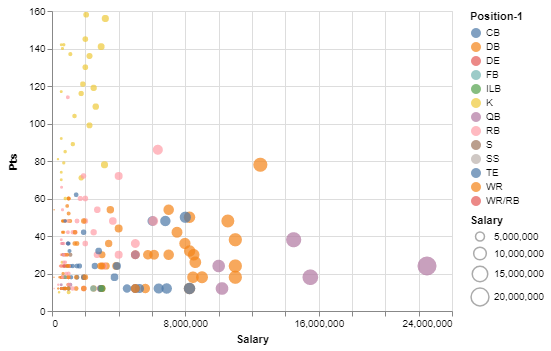

In [32]:
alt.Chart(nfl_scorers).mark_circle().encode(
    alt.X('Salary', scale=alt.Scale(zero=False)),
    alt.Y('Pts', scale=alt.Scale(zero=False, padding=1)),
    color='Position-1',
    size='Salary'
)